## Questions for data analysis (Power BI)
-- Demographic-Wise
- Which country has the most rate of churn
- Which gender has the most rate of churn
- age distribution for those who churn

-- Financial-Wise
- Salary distribution for those who churn 
- Balance distribution for those who churn 
- correlation between age and salary/balance

-- BankCustomer-wise
- Which tenure has the most rate of churn
- Which status has the most rate of churn (active or not)
- The rate of churn for different credit scores
- The rate of churn for different total product numbers 
- comparison between who own credit cards and who don't 
 



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , RandomizedSearchCV , learning_curve
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score


In [16]:
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Error")

    plt.plot(1 - train_scores_mean, 'o-', color="b",
             label="Training Error")
    plt.plot(1 - test_scores_mean, 'o-', color="r",
             label="Cross-validation Error")


    plt.legend(loc="best")

    plt.show()

In [17]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [19]:
df.duplicated().any()

False

In [20]:
df.isnull().any()

customer_id         False
credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [21]:
df.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [22]:
df = df.drop('customer_id', axis = 1)
df['gender'] = df['gender'].map({'Male': 1 , 'Female': 0})
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [24]:
df = pd.get_dummies(df)
df

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


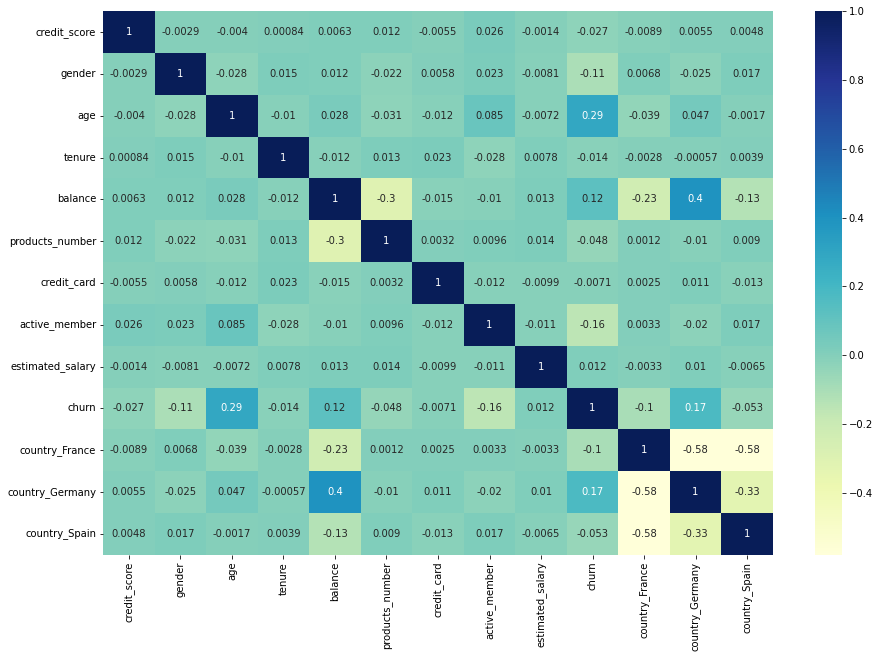

In [25]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

In [26]:
X = df.drop(['churn'], axis = 1)
y = df['churn'].values.ravel()

In [27]:
estimators = {AdaBoostClassifier() : {'n_estimators' : [50,100,150,200,250,300,350], 
                                      'learning_rate' : [0.05,0.1,0.15,0.2]} , 
              GradientBoostingClassifier() : {'n_estimators' : [50,100,150,200,250,300,350] , 
                                              'learning_rate' : [0.05,0.1,0.15,0.2]  ,
                                              'criterion' : ['friedman_mse', 'squared_error']}   ,
              svm.SVC() : {'C':[0.1,0.2,0.3,0.4,0.5], 'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] ,
                           'degree' : [3,4,5,6,7,8]}}

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train , X_test , y_train , y_test = train_test_split(X_scaled , y, test_size = 0.2 , shuffle = True)
for clf , hyper_params in estimators.items():
    rand = RandomizedSearchCV(clf , hyper_params, random_state = 3)
    rand.fit(X_train, y_train)
    preds = rand.predict(X_test)
    print("{} acuracy = {} % , and precision score = {} % \n Best parameters are {} \n"
          .format(str(clf).replace('()',''),round(accuracy_score(y_test, preds) *100,3),
                  round(precision_score(y_test, preds)*100,3),rand.best_params_))
    

AdaBoostClassifier acuracy = 86.8 % , and precision score = 80.717 % 
 Best parameters are {'n_estimators': 100, 'learning_rate': 0.15} 

GradientBoostingClassifier acuracy = 87.2 % , and precision score = 77.992 % 
 Best parameters are {'n_estimators': 350, 'learning_rate': 0.05, 'criterion': 'squared_error'} 

SVC acuracy = 86.05 % , and precision score = 84.27 % 
 Best parameters are {'kernel': 'poly', 'degree': 4, 'C': 0.5} 



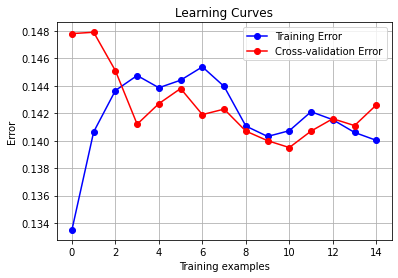

In [29]:
draw_learning_curves(X_scaled , y , AdaBoostClassifier(n_estimators= 100, learning_rate= 0.15), 15)

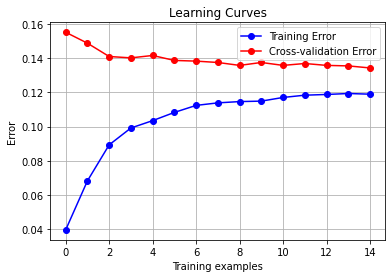

In [30]:
draw_learning_curves(X_scaled , y , GradientBoostingClassifier(n_estimators= 350, learning_rate = 0.05, 
                                                               criterion = 'squared_error'), 15)

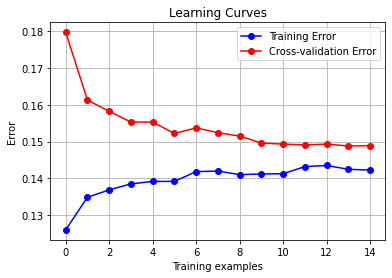

In [31]:
draw_learning_curves(X_scaled , y , svm.SVC(kernel = 'poly', degree = 4, C = 0.5), 15)